# All Lyrics

In [438]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import squarify # pip install squarify
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px # Requires: pip install plotly


In [439]:
file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/Alltøplyrics.xlsx'
df = pd.read_excel(file_path)

In [440]:
df.head()

,Unnamed: 0,album_release_date,album_release_year,Unnamed: 3,time_signature,minssecs,secs,duration_ms,track_name,track_number,...,album_name,key_name,mode_name,key_mode,Lyrics,Lyric source,Header,Count A,Unnamed: 19,Unnamed: 20
0,1,2025-09-12,2025,22.0,0.366667,5.37,322.0,322000.0,City Walls,1.0,...,Breach,NaN,NaN,NaN,"Square up with me, I can take your right, thro...",NaN,Data,1,NaN,NaN
1,2,2025-09-12,2025,22.0,0.366667,3.37,202.0,202000.0,Rawfear,2.0,...,Breach,NaN,NaN,NaN,"Raw fear\nRaw fear\n\nRaw fear moves me, sound...",NaN,Data,NaN,NaN,NaN
2,3,2025-09-12,2025,23.0,0.383333,3.38,203.0,203000.0,Drum Show,3.0,...,Breach,NaN,NaN,NaN,Puttin' on a drum show\nOoh-ooh\n\n[Verse 1: T...,NaN,Data,NaN,NaN,NaN
3,4,2025-09-12,2025,16.0,0.266667,3.27,196.0,196000.0,Garbage,4.0,...,Breach,NaN,NaN,NaN,I didn't do it\n\nI feel like garbage\nI feel ...,NaN,Data,NaN,NaN,NaN
4,5,2025-09-12,2025,45.0,0.750000,3.75,225.0,225000.0,The Contract,5.0,...,Breach,NaN,NaN,NaN,"I check the doors, check the windows and pull ...",NaN,Data,NaN,NaN,NaN


Average Sentiment by Album:
 album_name
Breach: Digital Remains      -0.921800
Twenty One Pilots            -0.313043
Vessel (with Bonus Tracks)   -0.229533
Trench                       -0.173700
Vessel                       -0.080615
No Phun Intended              0.000000
Blurryface                    0.026714
Clancy                        0.135700
Breach                        0.219154
Scaled And Icy                0.829709
Name: Sentiment_Score, dtype: float64


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


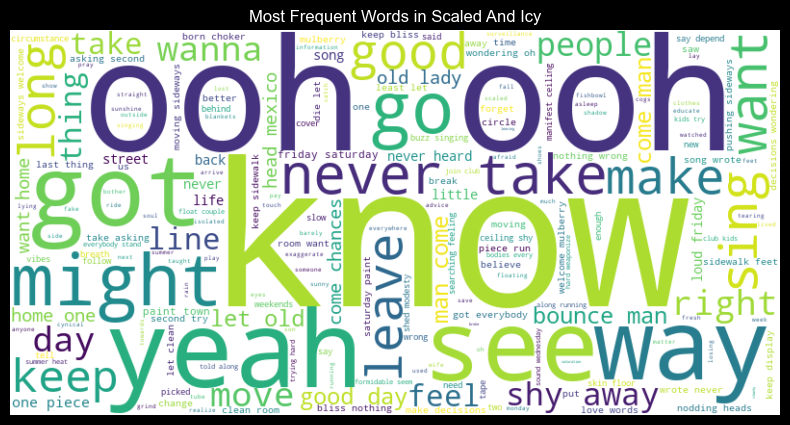

In [441]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('vader_lexicon')

# 2. Text Preprocessing
stop_words = set(stopwords.words('english'))

def clean_lyrics(text):
    # Lowercase and remove non-alphabetic characters
    words = str(text).lower().split()
    clean_words = [w for w in words if w.isalpha() and w not in stop_words]
    return " ".join(clean_words)

df['Clean_Lyrics'] = df['Lyrics'].apply(clean_lyrics)

# 3. Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Lyrics'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# 4. Group by Album for Analysis
album_sentiment = df.groupby('album_name')['Sentiment_Score'].mean().sort_values()
print("Average Sentiment by Album:\n", album_sentiment)

# 5. Visualize: Word Cloud for the most positive album
top_album = album_sentiment.idxmax()
text = " ".join(df[df['album_name'] == top_album]['Clean_Lyrics'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f"Most Frequent Words in {top_album}")
plt.axis('off')
plt.show()

In [442]:
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once", "not", "no", "yes", "so", "can", "just", "wanted", "where",
    "dont", "yeah", "let", "im", "ah", "want", "like", "ive", "all", "ooh", "ill", "even", "forforforforforfor", "every", "hoohoohoo", "hell",
    "yeahyeahyeahyeah", "daisychained", "thats", "there", "how", "somehow", "when", "used", "cant", "chorus", "lada"
]

# Function to remove stop words from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [443]:
df.info


<bound method DataFrame.info of      Unnamed: 0 album_release_date  album_release_year  Unnamed: 3  \
0             1         2025-09-12                2025        22.0   
1             2         2025-09-12                2025        22.0   
2             3         2025-09-12                2025        23.0   
3             4         2025-09-12                2025        16.0   
4             5         2025-09-12                2025        45.0   
..          ...                ...                 ...         ...   
111         112                NaT                2007         NaN   
112         113                NaT                2007         NaN   
113         114                NaT                2007         NaN   
114         115                NaT                2007         NaN   
115         116                NaT                2007         NaN   

     time_signature  minssecs   secs  duration_ms             track_name  \
0          0.366667      5.37  322.0     322000.0  

In [444]:
df.shape

(116, 23)

In [445]:
# Create a new DataFrame containing only songs from the album "Breach"
df_breach = df[df["album_name"] == "Breach"][["album_name", "track_name", "Lyrics"]]
df_clancy = df[df["album_name"] == "Clancy"][["album_name", "track_name", "Lyrics"]]
df_sai = df[df["album_name"] == "Scaled And Icy"][["album_name", "track_name", "Lyrics"]]
df_trench = df[df["album_name"] == "Trench"][["album_name", "track_name", "Lyrics"]]
df_blurryface = df[df["album_name"] == "Blurryface"][["album_name", "track_name", "Lyrics"]]
df_vessel = df[df["album_name"] == "Vessel"][["album_name", "track_name", "Lyrics"]]
df_self_titled = df[df["album_name"] == "Twenty One Pilots"][["album_name", "track_name", "Lyrics"]]
# To see the first few rows of your filtered data:
print(df_breach.head())

  album_name    track_name                                             Lyrics
0     Breach    City Walls  Square up with me, I can take your right, thro...
1     Breach       Rawfear  Raw fear\nRaw fear\n\nRaw fear moves me, sound...
2     Breach     Drum Show  Puttin' on a drum show\nOoh-ooh\n\n[Verse 1: T...
3     Breach       Garbage  I didn't do it\n\nI feel like garbage\nI feel ...
4     Breach  The Contract  I check the doors, check the windows and pull ...


In [446]:
# 1. Define the list of albums you want to analyze
target_albums = [
    "Breach", "Clancy", "Scaled And Icy", "Trench",
    "Blurryface", "Vessel", "Twenty One Pilots"
]

# 2. Filter the main DataFrame for these albums and specific columns
df_combined = df[df["album_name"].isin(target_albums)][["album_name", "track_name", "Lyrics"]]

# 3. Check the results
print(df_combined["album_name"].unique())
print(df_combined.shape)

['Breach' 'Clancy' 'Scaled And Icy' 'Trench' 'Blurryface' 'Vessel'
 'Twenty One Pilots']
(92, 3)


In [447]:
# List of the albums you want
target_albums = [
    "Breach", "Clancy", "Scaled And Icy", "Trench",
    "Blurryface", "Vessel", "Twenty One Pilots"
]

# Create a dictionary where the key is the album name and the value is its dataframe
albums = {name: df[df["album_name"] == name][["track_name", "Lyrics"]] for name in target_albums}

# How to use it:
# albums["Vessel"] now holds just the Vessel data
print(albums["Vessel"].head())

           track_name                                             Lyrics
67       Ode to Sleep  I wake up fine and dandy but then by the time ...
68  Holding on to You  I'm taking over my body,\nBack in control, no ...
69           Migraine  Am I the only one I know\nWaging my wars behin...
70      House of Gold  She asked me, Son, when I grow old,\nWill you ...
71          Car Radio  I ponder of something great My lungs will fill...


# Create a clean DataFrame for the whole album
all_albums = [Breach, Clancy, ScaledAndIcy, Trench, Blurryface, Vessel, Twenty_One_Pilots]  # List of your lyric variables
# 3. Combine with your song names (if you have them in a list)
album_names = ["Breach", "Clancy", "ScaledAndIcy", "Trench", "Blurryface", "Vessel", "Twenty_One_Pilots"] # Add all 14 names
df_AlbumTopics['Album_Name'] = song_names[:len(df_topics)]
df_all_albums = pd.DataFrame({
    'Album_Name': album_names,
    'Album_Lyrics': all_albums
})

### Create all_processed_words list

In [448]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

# 1. Setup: Load stopwords (words like 'the', 'and', 'is' that we want to ignore)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Optional: Add custom "filler" words common in songs
stop_words.update(['yeah', 'oh', 'ooh', 'woah', 'la', 'na'])

# 2. Define your target albums
target_albums = [
    "Breach", "Clancy", "Scaled And Icy", "Trench",
    "Blurryface", "Vessel", "Twenty One Pilots"
]

# 3. Process each album in a loop
album_themes = {}

for album in target_albums:
    # Filter for the current album
    # Note: Use 'Lyrics' or 'lyrics' depending on your exact column name
    album_df = df[df["album_name"] == album]

    # Combine all lyrics from this album into one big string
    all_text = " ".join(album_df["Lyrics"].astype(str)).lower()

    # Clean the text: keep only words, remove stopwords
    words = [word for word in all_text.split() if word.isalpha() and word not in stop_words]

    # Count the most common words (Themes)
    top_words = Counter(words).most_common(10)

    # Store the results in our dictionary
    album_themes[album] = top_words

# 4. Display the results
for album, themes in album_themes.items():
    print(f"\n--- Top Themes for {album} ---")
    for word, count in themes:
        print(f"{word}: {count}")


--- Top Themes for Breach ---
slowing: 32
one: 28
know: 24
want: 24
feel: 24
time: 23
never: 21
even: 19
like: 18
take: 17

--- Top Themes for Clancy ---
head: 24
time: 22
way: 22
know: 17
snap: 17
keep: 16
drop: 16
let: 15
even: 15
make: 14

--- Top Themes for Scaled And Icy ---
know: 34
like: 26
never: 24
take: 20
keep: 20
want: 19
get: 18
one: 16
got: 15
let: 15

--- Top Themes for Trench ---
know: 75
need: 34
go: 32
pet: 32
run: 23
get: 23
keep: 22
let: 21
one: 20
someone: 20

--- Top Themes for Blurryface ---
know: 44
bah: 40
help: 34
time: 29
save: 26
think: 24
good: 22
better: 19
one: 18
used: 18

--- Top Themes for Vessel ---
take: 33
know: 33
trying: 25
broken: 25
say: 21
wanna: 20
one: 18
make: 18
fake: 18
tell: 17

--- Top Themes for Twenty One Pilots ---
fall: 29
away: 22
know: 20
chorus: 19
get: 19
wanna: 14
take: 14
follow: 12
johnny: 12
time: 11


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### LDA training code

In [449]:
import nltk
from nltk.corpus import stopwords
import gensim
from gensim import corpora
import re

# List of your album dataframes
album_list = [df_breach, df_clancy, df_sai, df_trench, df_blurryface, df_vessel, df_self_titled]
album_names = ["Breach", "Clancy", "Scaled And Icy", "Trench", "Blurryface", "Vessel", "Self Titled"]

# 1. Download if you haven't already
nltk.download('stopwords')

# 2. CREATE A NEW SET from the stopwords (This is the fix)
stop_words = set(stopwords.words('english'))

# 3. Now .update() will work perfectly
extra_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once", "not", "no", "yes", "so", "can", "just", "wanted", "where",
    "dont", "yeah", "let", "im", "ah", "want", "like", "ive", "all", "ooh", "ill", "even", "forforforforforfor", "every", "hoohoohoo", "hell",
    "yeahyeahyeahyeah", "daisychained", "thats", "there", "how", "somehow", "when", "used", "cant"]
stop_words.update(extra_words)

print(f"Stopwords prepared. Total count: {len(stop_words)}")

Stopwords prepared. Total count: 221


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [450]:
def preprocess(text):
    # Clean: remove punctuation, lowercase, and split into words
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return [word for word in text.split() if word not in stop_words and len(word) > 2]

# Dictionary to store results for each album
all_album_topics = {}

for name, album_df in zip(album_names, album_list):
    # Process each song individually
    processed_songs = [preprocess(s) for s in album_df["Lyrics"].astype(str)]

    # Create dictionary from the list of lists
    dictionary = corpora.Dictionary(processed_songs)

    # Create corpus from the list of lists
    corpus = [dictionary.doc2bow(song) for song in processed_songs]

    # Train LDA...
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3)
    all_album_topics[name] = lda_model.print_topics(-1)

In [451]:
import gensim
from gensim import corpora

# 1. Create the Dictionary
# This maps every unique word to an ID
dictionary = corpora.Dictionary(processed_songs)

# 2. Create the Corpus
# This converts each song into a "Bag of Words" format (word_id, frequency)
corpus = [dictionary.doc2bow(text) for text in processed_songs]

# 3. Train the LDA Model
# We use 3 topics because 14 songs is a smaller sample size
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=100,
    update_every=1,
    chunksize=10, # Adjusted for your 14 songs
    passes=20,    # Increased passes to help the model find patterns in a small dataset
    alpha='auto'
)

# 4. Show the discovered Topics
print("--- Discovered Lyrical Themes ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")

--- Discovered Lyrical Themes ---
Topic 0: 0.016*"please" + 0.016*"plummet" + 0.013*"sing" + 0.013*"saw" + 0.013*"fly" + 0.011*"begin" + 0.010*"heart" + 0.009*"hear" + 0.009*"ground" + 0.008*"take"

Topic 1: 0.044*"lada" + 0.019*"mind" + 0.017*"away" + 0.016*"said" + 0.016*"youre" + 0.015*"afraid" + 0.014*"chorus" + 0.013*"know" + 0.010*"sometimes" + 0.010*"open"

Topic 2: 0.033*"fall" + 0.017*"get" + 0.013*"cause" + 0.012*"away" + 0.011*"know" + 0.011*"havent" + 0.011*"johnny" + 0.011*"boy" + 0.011*"wanna" + 0.011*"follow"



In [452]:
# Create the mapping based on your results
topic_labels = {
    0: "Vulnerability & Flight",
    1: "Anxiety & Internal Dialogue",
    2: "Nostalgia & Character Narrative"
}

print("--- Final Lyrical Analysis ---")
for idx, topic in lda_model.print_topics(-1):
    label = topic_labels.get(idx, "Unknown Theme")
    # Clean the topic string for better readability
    clean_words = ", ".join([word.split("*")[1].replace('"', '') for word in topic.split(" + ")])

    print(f"THEME: {label}")
    print(f"Keywords: {clean_words}\n")

--- Final Lyrical Analysis ---
THEME: Vulnerability & Flight
Keywords: please, plummet, sing, saw, fly, begin, heart, hear, ground, take

THEME: Anxiety & Internal Dialogue
Keywords: lada, mind, away, said, youre, afraid, chorus, know, sometimes, open

THEME: Nostalgia & Character Narrative
Keywords: fall, get, cause, away, know, havent, johnny, boy, wanna, follow



### Topic Model

In [453]:
import gensim
from gensim import corpora

# 1. Create the Dictionary
# This maps every unique word to a unique ID
dictionary = corpora.Dictionary(all_processed_words)

# 2. Create the Corpus
# This converts each song into a list of (word_id, word_frequency)
corpus = [dictionary.doc2bow(text) for text in all_processed_words]

# 3. Train the LDA Model
# We use 5 topics as a starting point for 14 songs
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=100,
    passes=20,     # More passes help with small datasets
    alpha='auto',  # Let the model learn the topic distribution
    per_word_topics=True
)

# 4. Display the Topics and their Top Words
print("--- Discovered Lyrical Themes ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")

--- Discovered Lyrical Themes ---
Topic 0: 0.039*"waste" + 0.032*"lie" + 0.032*"dormant" + 0.032*"days" + 0.025*"time" + 0.025*"cant" + 0.021*"cause" + 0.021*"afford" + 0.018*"say" + 0.018*"dont"

Topic 1: 0.051*"way" + 0.039*"one" + 0.034*"feel" + 0.032*"even" + 0.022*"know" + 0.021*"thats" + 0.020*"used" + 0.016*"want" + 0.016*"dont" + 0.016*"keep"

Topic 2: 0.023*"time" + 0.023*"somehow" + 0.021*"hoohoohoo" + 0.019*"believe" + 0.018*"dont" + 0.018*"entertain" + 0.016*"two" + 0.014*"glued" + 0.014*"every" + 0.014*"still"

Topic 3: 0.060*"never" + 0.052*"slowing" + 0.039*"ah" + 0.024*"like" + 0.020*"find" + 0.018*"ill" + 0.018*"fear" + 0.018*"raw" + 0.015*"im" + 0.015*"forever"

Topic 4: 0.029*"im" + 0.021*"right" + 0.016*"take" + 0.015*"hiding" + 0.015*"heart" + 0.013*"aim" + 0.013*"part" + 0.012*"ohoh" + 0.010*"believe" + 0.010*"want"



### Define lexicons

In [454]:
faith_words = ['faith', 'believe', 'god', 'pray', 'lord', 'creator', 'church', 'soul', 'spirit', 'halo', 'jesus', "lion", "holy"]
hope_words = ['hope', "love" 'hopeful', 'holding','light', 'morning', 'sun', 'sky', 'alive', 'stay', 'future', 'hold', 'better', "friends"]
word_words = ["flesh", "den", "mind"]

### The Analysis Code

In [455]:
def count_keywords(text, lexicon):
    words = str(text).lower().split()
    return sum(1 for word in words if word in lexicon)

# Apply the counting to your combined DataFrame
df_combined['Faith_Count'] = df_combined['Lyrics'].apply(lambda x: count_keywords(x, faith_words))
df_combined['Hope_Count'] = df_combined['Lyrics'].apply(lambda x: count_keywords(x, hope_words))
df_combined['Word_Count'] = df_combined['Lyrics'].apply(lambda x: count_keywords(x, hope_words))

# Calculate the most "Faithful" and "Hopeful" songs
top_faith_songs = df_combined.nlargest(5, 'Faith_Count')[['album_name', 'track_name', 'Faith_Count']]
top_hope_songs = df_combined.nlargest(5, 'Hope_Count')[['album_name', 'track_name', 'Hope_Count']]
top_word_songs = df_combined.nlargest(5, 'Word_Count')[['album_name', 'track_name', 'Word_Count']]
print("--- Top 5 Songs for Faith ---")
print(top_faith_songs)
print("\n--- Top 5 Songs for Hope ---")
print(top_hope_songs)
print("\n--- Top 5 Songs for Word ---")
print(top_word_songs)

--- Top 5 Songs for Faith ---
        album_name         track_name  Faith_Count
11          Breach              Tally           11
46          Trench           The Hype           11
68          Vessel  Holding on to You            9
48          Trench         Cut My Lip            6
28  Scaled And Icy           Good Day            5

--- Top 5 Songs for Hope ---
    album_name         track_name  Hope_Count
61  Blurryface           Polarize          19
42      Trench           My Blood          15
68      Vessel  Holding on to You           9
52      Trench     Leave the City           8
58  Blurryface           Lane Boy           8

--- Top 5 Songs for Word ---
    album_name         track_name  Word_Count
61  Blurryface           Polarize          19
42      Trench           My Blood          15
68      Vessel  Holding on to You           9
52      Trench     Leave the City           8
58  Blurryface           Lane Boy           8


### Aggregate by album

In [456]:
# Group by album and calculate the average occurrences
album_trends = df_combined.groupby('album_name')[['Faith_Count', 'Hope_Count']].mean()

# Sort by Faith to see which album leads
print("\n--- Theme Density by Album ---")
print(album_trends.sort_values(by='Faith_Count', ascending=False))


--- Theme Density by Album ---
                   Faith_Count  Hope_Count
album_name                                
Vessel                1.923077    2.923077
Trench                1.571429    2.142857
Breach                1.230769    1.461538
Twenty One Pilots     1.214286    1.500000
Scaled And Icy        0.727273    0.454545
Blurryface            0.500000    3.785714
Clancy                0.000000    1.692308


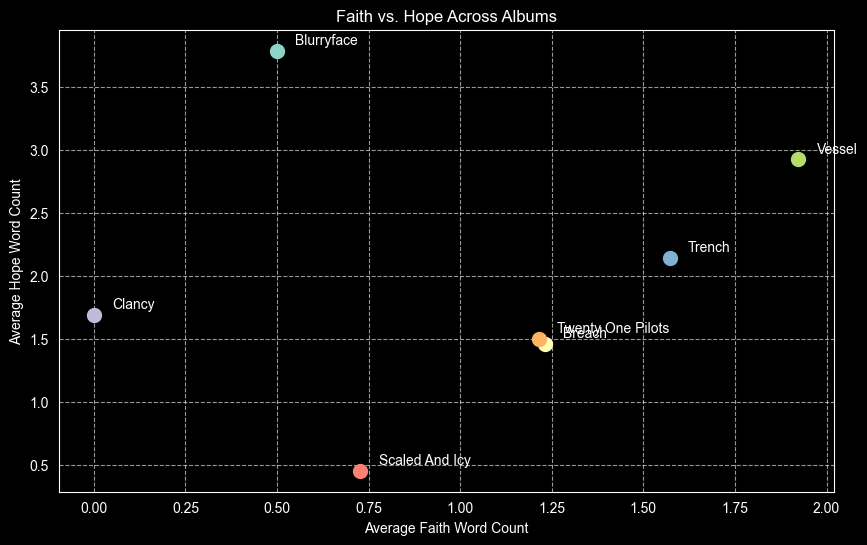

In [457]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for i, album in enumerate(album_trends.index):
    plt.scatter(album_trends.loc[album, 'Faith_Count'],
                album_trends.loc[album, 'Hope_Count'],
                label=album, s=100)
    plt.text(album_trends.loc[album, 'Faith_Count']+0.05,
             album_trends.loc[album, 'Hope_Count']+0.05, album)

plt.title("Faith vs. Hope Across Albums")
plt.xlabel("Average Faith Word Count")
plt.ylabel("Average Hope Word Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Breach Specific Starts Here

In [458]:
topic_labels = {
    0: "Faith & Resilience",
    1: "Emotional Exposure",
    2: "Search for Truth",
    3: "Wasted Time",
    4: "Path & Purpose"
}

In [459]:
for i, topic in enumerate(lda_model.print_topics()):
    print(f"Topic {i} ({topic_labels[i]}): {topic}")

Topic 0 (Faith & Resilience): (0, '0.039*"waste" + 0.032*"lie" + 0.032*"dormant" + 0.032*"days" + 0.025*"time" + 0.025*"cant" + 0.021*"cause" + 0.021*"afford" + 0.018*"say" + 0.018*"dont"')
Topic 1 (Emotional Exposure): (1, '0.051*"way" + 0.039*"one" + 0.034*"feel" + 0.032*"even" + 0.022*"know" + 0.021*"thats" + 0.020*"used" + 0.016*"want" + 0.016*"dont" + 0.016*"keep"')
Topic 2 (Search for Truth): (2, '0.023*"time" + 0.023*"somehow" + 0.021*"hoohoohoo" + 0.019*"believe" + 0.018*"dont" + 0.018*"entertain" + 0.016*"two" + 0.014*"glued" + 0.014*"every" + 0.014*"still"')
Topic 3 (Wasted Time): (3, '0.060*"never" + 0.052*"slowing" + 0.039*"ah" + 0.024*"like" + 0.020*"find" + 0.018*"ill" + 0.018*"fear" + 0.018*"raw" + 0.015*"im" + 0.015*"forever"')
Topic 4 (Path & Purpose): (4, '0.029*"im" + 0.021*"right" + 0.016*"take" + 0.015*"hiding" + 0.015*"heart" + 0.013*"aim" + 0.013*"part" + 0.012*"ohoh" + 0.010*"believe" + 0.010*"want"')


### Quantify the vibe of each song

In [460]:
import pandas as pd

def get_dominant_topic(ldamodel, corpus):
    # Initialize a list to hold our data
    topic_data = []

    # Iterate through each song in the corpus
    for i, row in enumerate(ldamodel[corpus]):
        # The row contains a list of (topic_id, probability) tuples
        # Sort it so the highest probability is first
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)

        # Get the top topic ID and its percentage
        topic_num, prop_topic = row[0]

        # Add to our list
        topic_data.append([i, int(topic_num), round(prop_topic, 4)])

    return pd.DataFrame(topic_data, columns=['Song_ID', 'Dominant_Topic', 'Topic_Perc_Contribution'])

# 2. Generate the Dataframe
df_topics = get_dominant_topic(lda_model, corpus)

topic_labels = {
    0: "Faith & Resilience",
    1: "Emotional Exposure",
    2: "Search for Truth",
    3: "Wasted Time",
    4: "Path & Purpose"
}
df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

# 3. Combine with your song names (if you have them in a list)
song_names = ["City_Walls", "RAWFEAR", "Drum_Show", "Garbage", "The_Contract",
    "Downstairs", "Robot Voices", "Center Mass", "Cottonwood",
    "One_Way", "Days_Lie_Dormant", "Tally", "Intentions", "Drag_Path"] # Add all 14 names
df_topics['Song_Name'] = song_names[:len(df_topics)]

# Display the final table
print(df_topics[['Song_Name', 'Topic_Label', 'Dominant_Topic', 'Topic_Perc_Contribution']])

           Song_Name         Topic_Label  Dominant_Topic  \
0         City_Walls    Search for Truth               2   
1            RAWFEAR         Wasted Time               3   
2          Drum_Show  Emotional Exposure               1   
3            Garbage         Wasted Time               3   
4       The_Contract  Emotional Exposure               1   
5         Downstairs      Path & Purpose               4   
6       Robot Voices      Path & Purpose               4   
7        Center Mass      Path & Purpose               4   
8         Cottonwood    Search for Truth               2   
9            One_Way  Emotional Exposure               1   
10  Days_Lie_Dormant  Faith & Resilience               0   
11             Tally    Search for Truth               2   
12        Intentions    Search for Truth               2   
13         Drag_Path         Wasted Time               3   

    Topic_Perc_Contribution  
0                    0.9995  
1                    0.9996  
2        

Discovered Lyrical Themes
Topic 0: Persistent Reminiscing Focuses on the passage of time, keeping score of past hurts ("tally," "track," "replay"), and the struggle to "believe" while feeling "lost" in heartbreak.

Topic 1: Unfiltered Vulnerability Centers on raw emotions and internal conflict, specifically the refusal to slow down despite "fear" and the "raw" feeling of "hiding" one's heart.

Topic 2: Searching for Proof Reflects a quest for clarity or "evidence," using imagery of things being "etched" on the "surface" to "find" or "know" the truth.

Topic 3: Regret and Stagnation Deals with the anxiety of "wasting" time and "days" lying "dormant," highlighting the realization that one cannot "afford" to let more time slip away.

Topic 4: Direction and Intent Explores the path forward ("way") and the internal "intentions" or "aim" behind one's actions, balancing "right" and "will."

In [461]:
# Create a new column for the descriptive label
df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

# Displaying the final organized table
print(df_topics[['Song_Name', 'Topic_Label', 'Topic_Perc_Contribution']])

           Song_Name         Topic_Label  Topic_Perc_Contribution
0         City_Walls    Search for Truth                   0.9995
1            RAWFEAR         Wasted Time                   0.9996
2          Drum_Show  Emotional Exposure                   0.9994
3            Garbage         Wasted Time                   0.9991
4       The_Contract  Emotional Exposure                   0.9995
5         Downstairs      Path & Purpose                   0.9995
6       Robot Voices      Path & Purpose                   0.9991
7        Center Mass      Path & Purpose                   0.9996
8         Cottonwood    Search for Truth                   0.9989
9            One_Way  Emotional Exposure                   0.9989
10  Days_Lie_Dormant  Faith & Resilience                   0.9994
11             Tally    Search for Truth                   0.9994
12        Intentions    Search for Truth                   0.9972
13         Drag_Path         Wasted Time                   0.9991


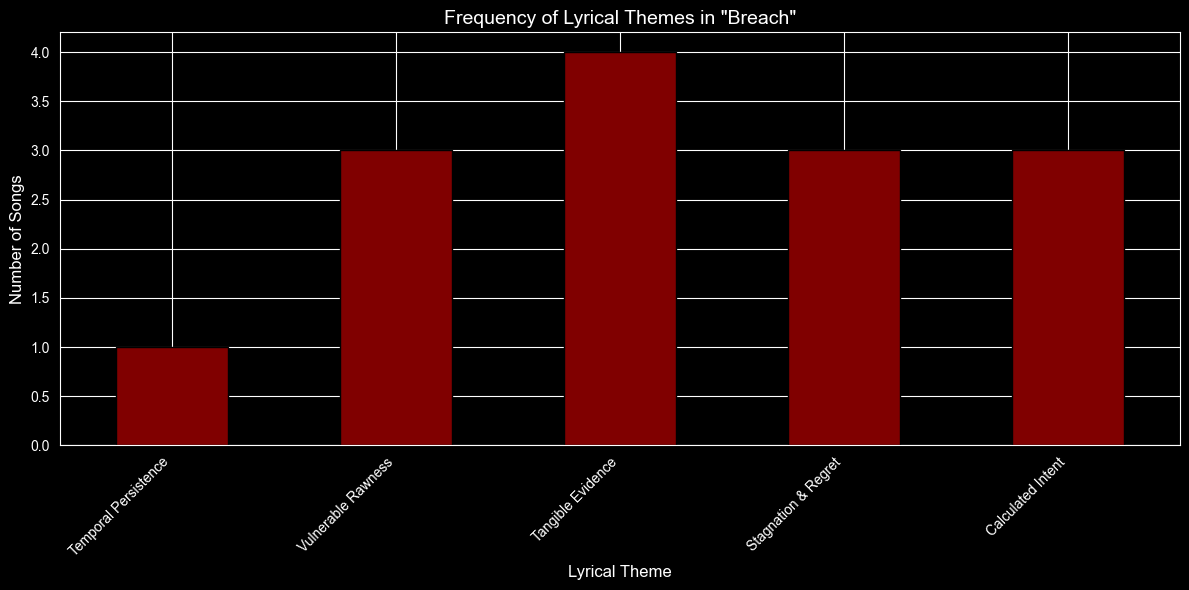

In [462]:
import matplotlib.pyplot as plt

# 1. Ensure the mapping is applied (if not already done)
topic_labels = {
    0: "Temporal Persistence",
    1: "Vulnerable Rawness",
    2: "Tangible Evidence",
    3: "Stagnation & Regret",
    4: "Calculated Intent"
}
df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

# 2. Count the occurrences of each label
# We use the list of values from our dictionary to keep the 0-4 order
ordered_labels = [topic_labels[i] for i in range(5)]
topic_counts = df_topics['Topic_Label'].value_counts().reindex(ordered_labels).fillna(0)

# 3. Create the bar chart
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar', color='maroon', edgecolor='black')

plt.title('Frequency of Lyrical Themes in "Breach"', fontsize=14)
plt.xlabel('Lyrical Theme', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)

# Set the x-ticks to your specific labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

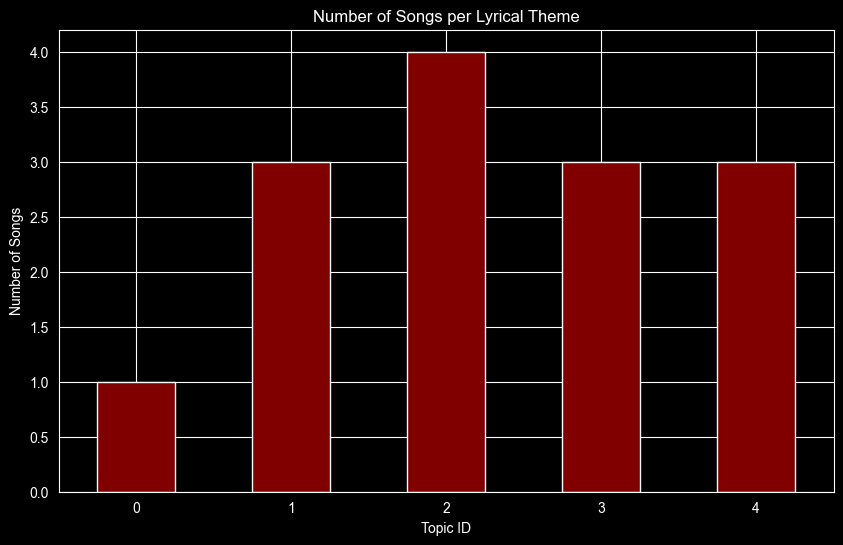

In [463]:
import matplotlib.pyplot as plt

# Count how many songs fall into each topic
topic_counts = df_topics['Dominant_Topic'].value_counts().sort_index()

# Simple bar chart
plt.figure(figsize=(10,6))
topic_counts.plot(kind='bar', color='maroon')
plt.title('Number of Songs per Lyrical Theme')
plt.xlabel('Topic ID')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()

### Breach Bar Chart

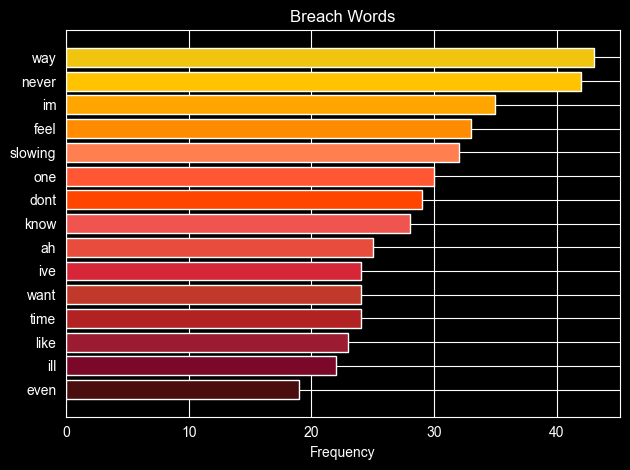

In [464]:
# Convert your Counter object to a sorted DataFrame
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
df_counts = df_counts.sort_values(by='Count', ascending=True)

# Define Red/Orange/Yellow palette
# You can add as many hex codes as you like to get the exact look
warm_colors = [
    '#4A0E0E', # Dark Garnet
    '#7B0828', # Deep Ruby
    '#9B1B30', # Chili Pepper
    '#B22222', # Firebrick
    '#C0392B', # Pomegranate
    '#D72638', # Crimson
    '#E74C3C', # Alizarin
    '#F0544F', # Soft Coral
    '#FF4500', # Orange Red
    '#FF5733', # Persimmon
    '#FF7F50', # Coral
    '#FF8C00', # Dark Orange
    '#FFA500', # Orange
    '#FFC300', # Sunflower
    '#F1C40F'  # Maize
]

# Create the plot
plt.barh(df_counts['Word'], df_counts['Count'], color=warm_colors)
plt.xlabel('Frequency')
plt.title('Breach Words')
plt.tight_layout()

# Save or display
plt.savefig('breach.png')

### Breach Lollipop

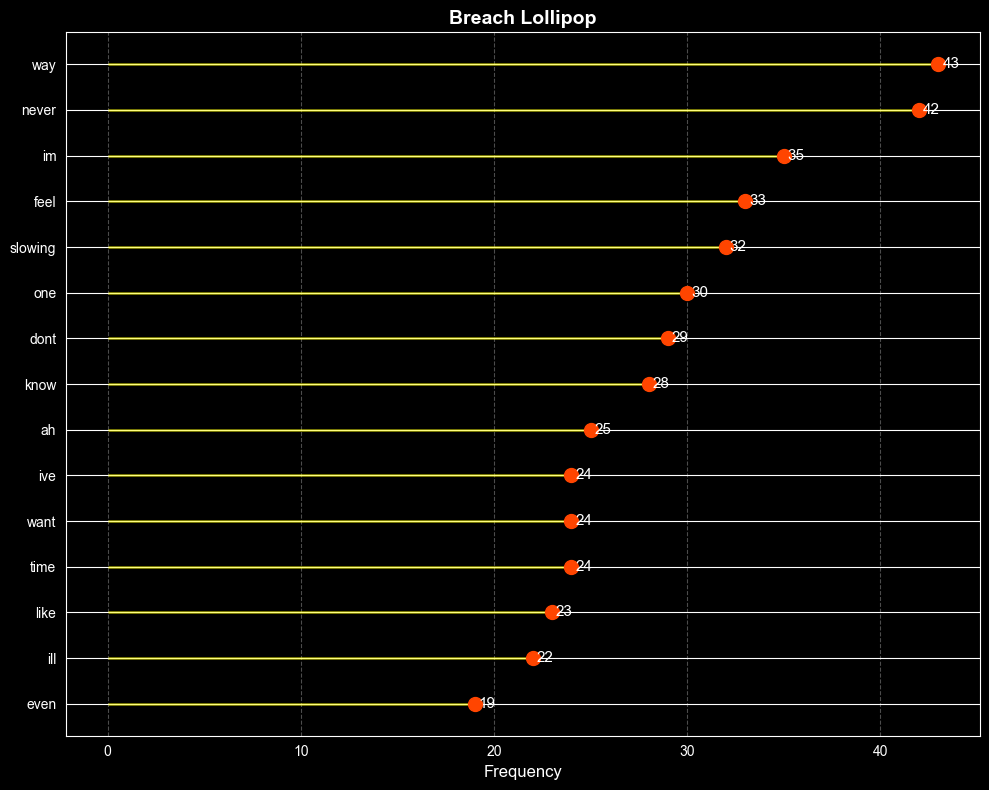

In [465]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
# Sorting ensures the "longest" lollipops are at the top
df_counts = df_counts.sort_values(by='Count', ascending=True)

# 2. Create the plot
plt.figure(figsize=(10, 8))

# Draw the "stems" (horizontal lines)
plt.hlines(y=df_counts['Word'], xmin=0, xmax=df_counts['Count'], color='yellow', alpha=0.5, linewidth=2)

# Draw the "candies" (the dots)
plt.plot(df_counts['Count'], df_counts['Word'], "o", markersize=10, color='orangered')

# 3. Styling
plt.xlabel('Frequency', fontsize=12)
plt.title('Breach Lollipop', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3) # Horizontal grids help track the values

# Add labels to the end of the dots (optional)
for i, count in enumerate(df_counts['Count']):
    plt.text(count + 0.2, i, str(count), va='center', fontsize=11)

plt.tight_layout()

# 4. Save or display
plt.savefig('breach_lollipop.png')
plt.show()

### Breach Bubble Chart

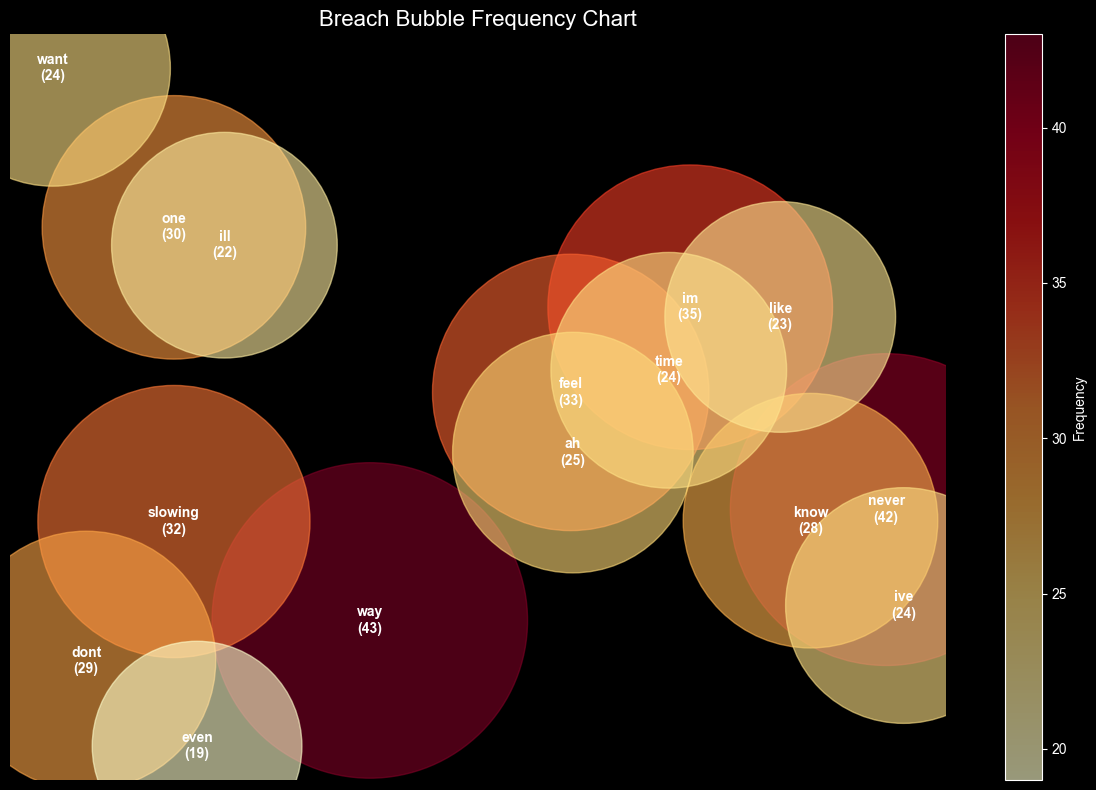

In [466]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Setup positions for the bubbles (random or ordered)
# We use random X and Y coordinates to spread the bubbles out
np.random.seed(42) # Keeps the layout the same every time you run it
df_counts['x'] = np.random.rand(15)
df_counts['y'] = np.random.rand(15)

# 3. Create the plot
plt.figure(figsize=(12, 8))

# Squaring the count allows for more dramatic size differences
df_counts['size'] = df_counts['Count'] ** 2

# s= size of bubbles (multiplied by a factor to make them visible)
# c= color (can be mapped to the count)
scatter = plt.scatter(
    df_counts['x'],
    df_counts['y'],
    s=df_counts['Count'] * 1200,  # Adjust the multiplier (100) based on your data scale
    c=df_counts['Count'],
    cmap='YlOrRd',
    alpha=0.6,
)

# 4. Add the word labels inside or near the bubbles
for i, row in df_counts.iterrows():
    plt.annotate(
        f"{row['Word']}\n({row['Count']})",
        (row['x'], row['y']),
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# 5. Styling
plt.title('Breach Bubble Frequency Chart', fontsize=16)
plt.axis('off') # Hide axes for a cleaner "cloud" look
plt.colorbar(scatter, label='Frequency') # Optional: adds a color scale legend

plt.tight_layout()
plt.savefig('breach_bubble.png')
plt.show()

### Breach Tree Map

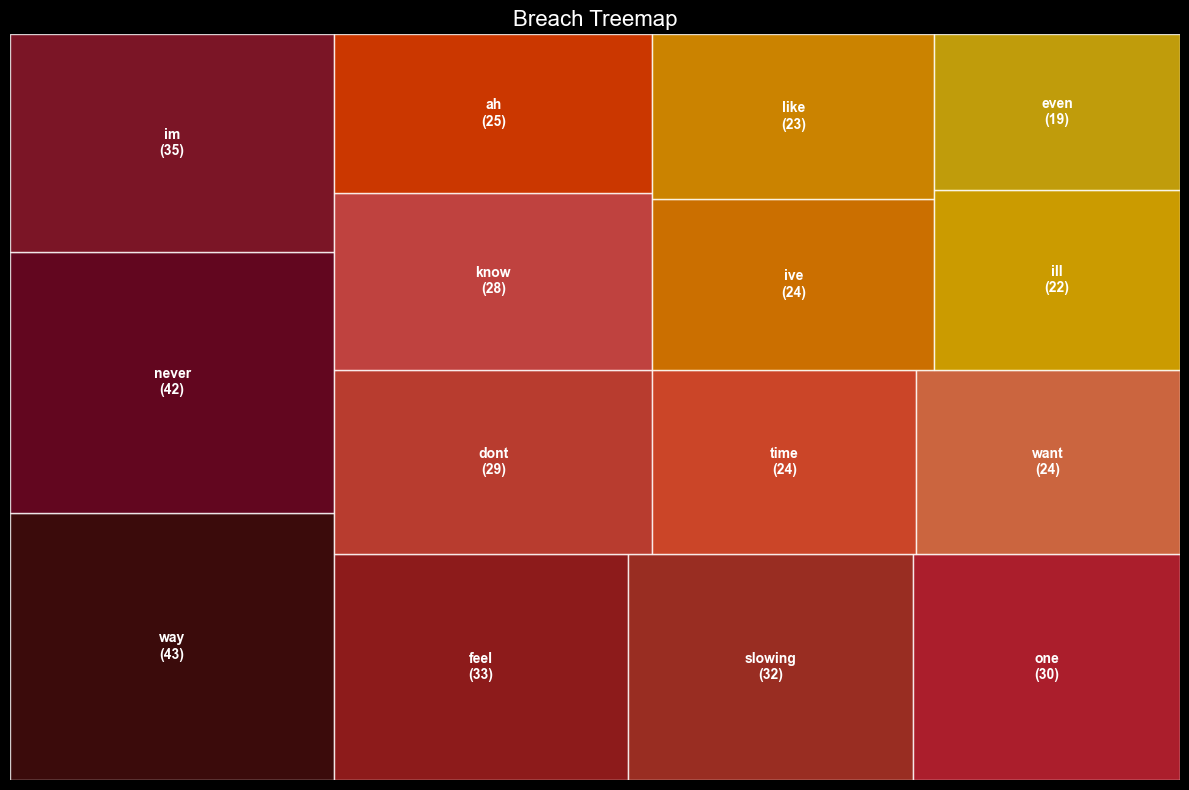

In [467]:
# 1. Prepare your data (from your existing Counter object)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Create the plot
plt.figure(figsize=(12, 8))

# Define colors (using a nice Seaborn palette)
colors = sns.color_palette('viridis', len(df_counts))

# Create labels that include the word and the count
labels = [f"{row['Word']}\n({row['Count']})" for i, row in df_counts.iterrows()]

# 3. Draw the Treemap
squarify.plot(
    sizes=df_counts['Count'],
    label=labels,
    color=warm_colors,
    alpha=0.8,
    text_kwargs={'fontsize': 10, 'fontweight': 'bold'}
)

# 4. Styling
plt.title('Breach Treemap', fontsize=16)
plt.axis('off') # Treemaps don't need axes

plt.tight_layout()
plt.savefig('breach_treemap.png')
plt.show()

### Breach Word Cloud

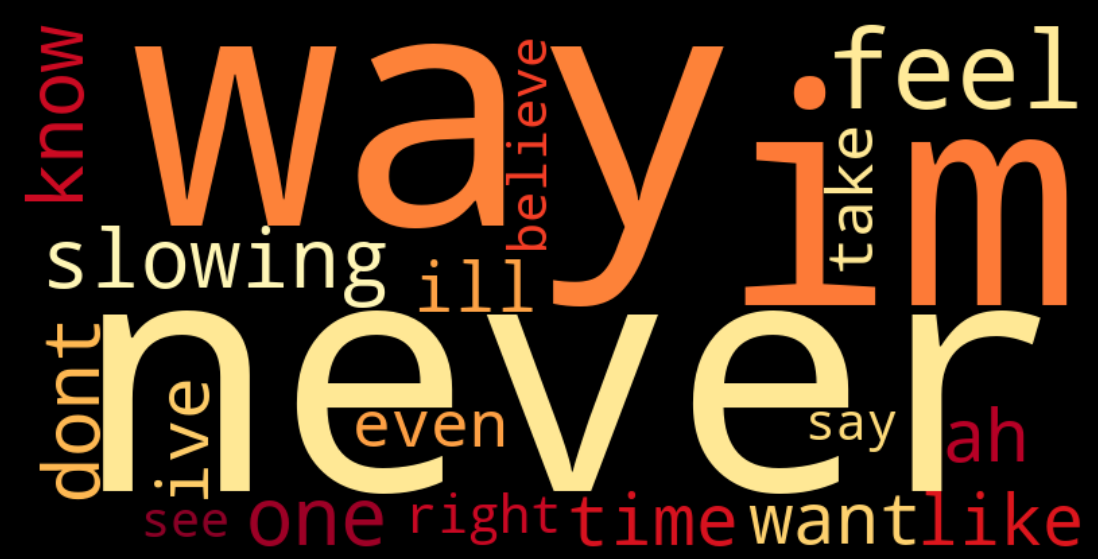

In [468]:
# Join all words into one string weighted by their count
word_freq = dict(counts.most_common(20))

wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='YlOrRd'
).generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Breach Radial Bar Chart

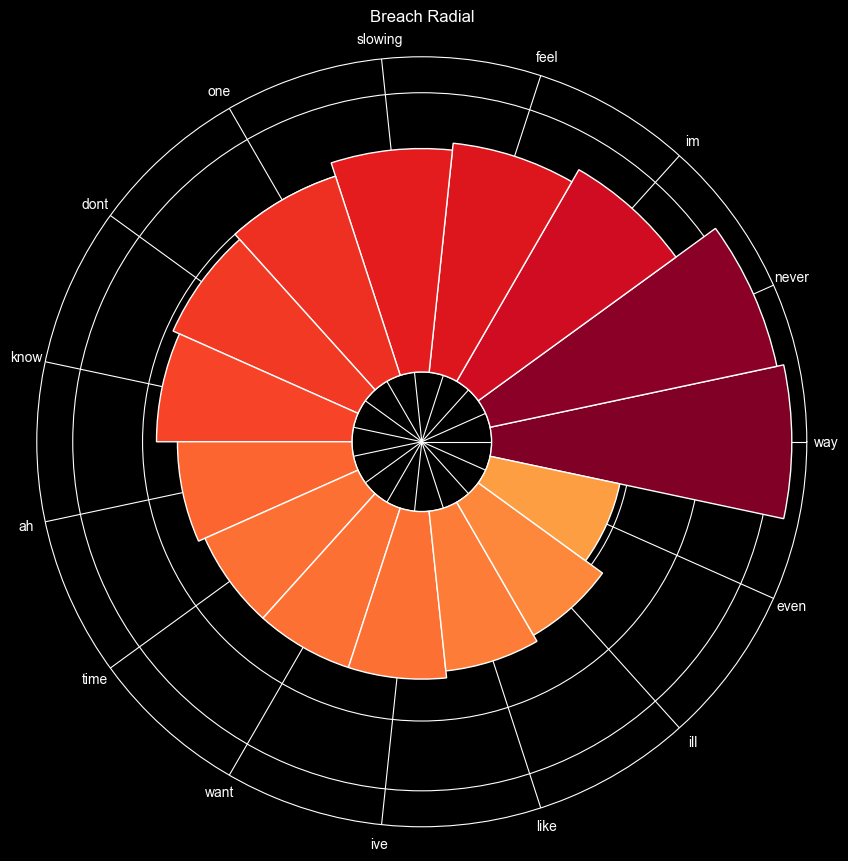

In [469]:
# Prepare data
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
n = len(df_counts)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
widths = [2 * np.pi / n] * n

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Create the bars
bars = ax.bar(angles, df_counts['Count'], width=widths, bottom=10,
              color=plt.cm.YlOrRd(df_counts['Count'] / df_counts['Count'].max()),
              edgecolor='white')

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels(df_counts['Word'], fontsize=10)
ax.set_yticklabels([]) # Hide radial grid numbers
plt.title("Breach Radial", va='bottom')
plt.show()

### Breach Funnel Chart

In [470]:
import plotly.express as px
import pandas as pd

df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

fig = px.funnel(df_counts,
                x='Count',
                y='Word',
                title='Top 15 Lyrics Word Frequency',
                color='Word',
                color_discrete_sequence=warm_colors)

fig.show()

### Breach Words by Length

In [471]:
# 1. Properly flatten and split your list of lyrics
word_list = []

if isinstance(filtered_lyrics, str):
    # If it's just one string, split it
    word_list = filtered_lyrics.split()
else:
    # If it's a list (lyrics_list), iterate through each song and split
    for song in filtered_lyrics:
        if isinstance(song, str):
            word_list.extend(song.split())

# Now word_list contains every individual word from every song
print(f"Total words processed: {len(word_list)}")

Total words processed: 113


In [472]:
# Assuming 'processed_lyrics' is your list of words for an album
# This line creates the missing 'word_lengths' variable
word_lengths = [len(w) for w in processed_lyrics]

# Now you can use it, for example, to see the average word length:
avg_length = sum(word_lengths) / len(word_lengths)
print(f"Average word length: {avg_length}")

Average word length: 136.53846153846155


In [473]:
# 2. Categorize
for word in word_list:
    # Skip empty strings if any
    if not word:
        continue

    length = len(word)
    if length not in word_lengths:
        word_lengths[length] = []

    word_lengths[length].append(word)

# 3. Display the results correctly
print(f"Total words processed: {len(word_list)}")
print("-" * 30)

for length in sorted(word_lengths.keys()):
    # Get unique examples so we don't see the same word 5 times
    unique_words = list(set(word_lengths[length]))
    count = len(word_lengths[length])
    examples = unique_words[:5]

    print(f"Length {length:2}: {count:4} words found. Examples: {examples}")

Total words processed: 113
------------------------------


AttributeError: 'list' object has no attribute 'keys'

In [ ]:
from collections import Counter

print("--- TOP 5 WORDS BY LENGTH (1-14) ---")

# Ensure word_lengths exists from your previous flattening step
for length in range(1, 15):
    if length in word_lengths and word_lengths[length]:
        # Count occurrences of each word of this specific length
        counts = Counter(word_lengths[length])

        # Get the top 5 most frequent words
        top_words = counts.most_common(5)

        # Format and print the words and their frequencies
        word_list_str = ", ".join([f"'{word}' ({count})" for word, count in top_words])
        print(f"Length {length:2}: {word_list_str}")
    else:
        print(f"Length {length:2}: No words found.")

In [ ]:
from collections import Counter

print("--- TOP 5 WORDS BY LENGTH (1-14) ---")

# Loop through lengths 1 to 14
for length in range(1, 15):
    # Check if we actually have words of this length to avoid errors
    if length in word_lengths and word_lengths[length]:
        counts = Counter(word_lengths[length])
        top_words = counts.most_common(5)

        # Formatting the output for readability
        word_list_str = ", ".join([f"'{word}' ({count})" for word, count in top_words])
        print(f"Length {length:2}: {word_list_str}")
    else:
        print(f"Length {length:2}: No words found.")

In [ ]:
import numpy as np

# Prepare data
lengths = sorted(word_lengths.keys())
counts = [len(word_lengths[l]) for l in lengths]

# Set up the polar projection
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Create the angles for the bars
angles = np.linspace(0, 2 * np.pi, len(lengths), endpoint=False)
width = (2 * np.pi) / len(lengths)

# Use your expanded reds for the colors
colors = plt.cm.YlOrRd(np.linspace(0.4, 1, len(lengths)))

bars = ax.bar(angles, counts, width=width, color=colors, edgecolor='white')

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels([f"{l} letters" for l in lengths])
ax.set_yticklabels([]) # Hide the radial grids for a cleaner look
plt.title("Lyric Density Spiral", va='bottom', fontsize=15)
plt.show()

### Breach Statistical Distribution of Word Lengths

In [ ]:
import seaborn as sns

# Create a list of the lengths of every word in your dataset
lengths_data = [len(w) for w in word_list]

plt.figure(figsize=(10, 4))
sns.boxplot(x=lengths_data, color="#D72638")
plt.title('Statistical Distribution of Breach Lyric Word Lengths')
plt.xlabel('Number of Letters')
plt.show()

### Breach Word Cloud Color-Coded by Length

In [ ]:
from wordcloud import WordCloud

# Create a single string where words are repeated based on frequency
text_for_cloud = " ".join(word_list)

# Custom color function: Redder for longer words, Yellower for shorter
def color_by_length(word, font_size, position, orientation, random_state=None, **kwargs):
    length = len(word)
    if length <= 3: return "rgb(255, 215, 0)"   # Yellow
    elif length <= 6: return "rgb(255, 140, 0)" # Orange
    else: return "rgb(215, 38, 56)"             # Red

wc = WordCloud(background_color="black", width=800, height=400,
               color_func=color_by_length).generate(text_for_cloud)

plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('breach_length_distribution.png', format='png', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

# 1. Prepare the data
# We sort the lengths (keys) so the X-axis goes 1, 2, 3...
lengths = sorted(word_lengths.keys())
counts = [len(word_lengths[l]) for l in lengths]

# 2. Create the Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(lengths, counts, color='red', edgecolor='navy')

# 3. Add labels and title
plt.xlabel('Word Length (Number of Letters)', fontsize=12)
plt.ylabel('Frequency (How many words)', fontsize=12)
plt.title('Distribution of Word Lengths Across All 12 Notebooks', fontsize=14)

# 4. Make it look professional
plt.xticks(lengths)  # Ensures every length (1, 2, 3...) is labeled on the bottom
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add the exact count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, yval, ha='center', va='bottom')

plt.savefig('word_length_distribution.png')